## 1. Introduction to SVM

### 1.1 What is SVM?

Support Vector Machine (SVM) is a supervised learning algorithm used for **classification** (and also regression, but primarily classification). At its core, it tries to find a **hyperplane** that best separates data points of different classes.

For a binary classification problem, SVM finds a line (in 2D), a plane (in 3D), or more generally, a hyperplane in higher dimensions that maximally separates the two classes.

The key idea:  
>**Maximise the margin** — the distance between the hyperplane and the nearest data points of each class (called support vectors). This leads to better generalisation.

Mathematically, given a training dataset of $n$ points:

$$
\{(\mathbf{x}_i, y_i)\}_{i=1}^n, \quad \mathbf{x}_i \in \mathbb{R}^d, \quad y_i \in \{-1, 1\}
$$

the goal is to find the hyperplane defined by:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

such that it separates the data with the largest margin.


#### Is SVM an Instance-Based Model?

Yes — Support Vector Machine (SVM) can be considered an **instance-based model**, particularly in its dual form or when using kernels.

**Instance-based learning** refers to models that **store training data** (or a subset of it) and make predictions by comparing new instances to stored ones. The model complexity grows with the number of relevant training instances.

In SVM:
- Only a **subset of training examples**, known as **support vectors**, directly determine the decision boundary.
- These support vectors are stored and used during prediction.
- This makes SVM **sparse** and efficient: only influential data points are used.

**In contrast**, logistic regression is a **parametric model**:
- It learns a fixed set of parameters ($\mathbf{w}, b$) from the data.
- Once trained, the model **does not retain the training data**.
- Predictions are based entirely on the learned parameters.

#### Summary of Key Differences

| Aspect                  | SVM                               | Logistic Regression            |
|-------------------------|------------------------------------|-------------------------------|
| Model type              | Instance-based (in dual form)      | Parametric                     |
| Uses training data at inference | Yes (support vectors only)       | No                             |
| Decision boundary       | Maximises margin                   | Based on probability threshold |
| Loss function           | Hinge loss                         | Log loss (cross-entropy)       |
| Output                  | Class label (+1 or -1)             | Probability (sigmoid)          |

### 1.2 Linear SVM Intuition

To understand a **linear SVM**, imagine trying to draw a straight line that separates two classes of points on a 2D plane.

There may be **many possible lines** that separate the classes, but SVM chooses the one that:
> **Maximises the margin** between the classes — i.e., it is as far away as possible from the nearest points on either side.

These closest points are called **support vectors**. The margin is the distance from the hyperplane to the nearest support vector on either side.

If the margin is larger, the model is less likely to misclassify new points — this helps improve **generalisation**.

#### What is $\mathbf{w}$?

In the equation of the hyperplane:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

- $\mathbf{w}$ is the **weight vector** (a vector of coefficients).
- $\mathbf{x}$ is the **input feature vector**.
- $b$ is the **bias** (intercept term).

The weight vector $\mathbf{w}$ determines the **orientation** of the decision boundary, and its magnitude controls the **width of the margin**. Each component $w_j$ reflects the **importance of feature $x_j$**.


#### Deriving the Margin

SVM tries to **maximise the margin**, which is the distance between two parallel hyperplanes:

- For class +1:
  $$
  \mathbf{w} \cdot \mathbf{x} + b = +1
  $$
- For class –1:
  $$
  \mathbf{w} \cdot \mathbf{x} + b = -1
  $$

The margin is the perpendicular distance between these two planes.

To find this, we use the formula for distance between a point and a hyperplane:

$$
\text{Distance} = \frac{|\mathbf{w} \cdot \mathbf{x} + b|}{\|\mathbf{w}\|}
$$

Let $\mathbf{x}_+$ and $\mathbf{x}_-$ be support vectors on each side. Then:

- $\mathbf{w} \cdot \mathbf{x}_+ + b = 1$
- $\mathbf{w} \cdot \mathbf{x}_- + b = -1$

So the margin becomes:

$$
\text{Margin} = \frac{|(\mathbf{w} \cdot \mathbf{x}_+ + b) - (\mathbf{w} \cdot \mathbf{x}_- + b)|}{\|\mathbf{w}\|} = \frac{2}{\|\mathbf{w}\|}
$$

This shows that maximising the margin is equivalent to **minimising $\|\mathbf{w}\|$**.


#### Decision Rule

Once trained, the SVM uses the following rule for classification:

$$
\text{Predict } y = \begin{cases}
+1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b \geq 0 \\
-1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b < 0
\end{cases}
$$

This is a **linear decision boundary** determined by the support vectors.

### 1.3 Decision Boundary and Margin

In SVM, the decision boundary is a hyperplane defined by the equation:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

This hyperplane separates the feature space into two halves, each corresponding to one of the two classes. The classification rule is:

$$
\text{Predict } y = \begin{cases}
+1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b \geq 0 \\
-1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b < 0
\end{cases}
$$

The goal of SVM is not just to separate the data, but to do so with the **maximum possible margin**. The margin is defined as the distance between the two closest data points (support vectors) from each class and the decision boundary.

These two margin boundaries are given by:

$$
\mathbf{w} \cdot \mathbf{x} + b = +1 \quad \text{and} \quad \mathbf{w} \cdot \mathbf{x} + b = -1
$$

The margin is the perpendicular distance between these two planes. It is given by:

$$
\text{Margin} = \frac{2}{\|\mathbf{w}\|}
$$

This formula shows that maximising the margin is equivalent to minimising $\|\mathbf{w}\|$.

A larger margin tends to reduce overfitting and improve generalisation. Therefore, the SVM optimisation objective balances two things:
- Finding a separating hyperplane
- Maximising the margin (i.e., minimising $\|\mathbf{w}\|$)

Only the support vectors (the data points closest to the margin) affect the decision boundary. All other points do not influence the final model.

### 1.4 Hard Margin vs Soft Margin

SVMs aim to find a hyperplane that separates two classes with the maximum margin. But what if the data is not perfectly separable?

This leads to two variants of SVM: hard margin and soft margin.

#### Hard Margin SVM

A hard margin SVM assumes that the data is linearly separable — that is, there exists a hyperplane that perfectly separates the classes with no misclassifications.

The constraints are:

$$
y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \text{for all } i
$$

This approach only works if the data is perfectly clean and separable. It is highly sensitive to outliers — one mislabelled or noisy point can prevent the model from finding a solution.

#### Soft Margin SVM

Most real-world data is not perfectly separable. To handle this, SVM introduces slack variables $\xi_i$ to allow some violations of the margin constraints.

The updated constraints become:

$$
y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \quad \text{with } \xi_i \geq 0
$$

The objective function now balances two goals:
- Maximising the margin (i.e., minimising $\|\mathbf{w}\|^2$)
- Penalising misclassifications (i.e., minimising $\sum \xi_i$)

The combined loss function is:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Here, $C > 0$ is a regularisation parameter that controls the trade-off:
- A large $C$ penalises misclassifications more heavily, leading to a narrower margin.
- A small $C$ allows more flexibility (margin violations), potentially leading to better generalisation.

#### Summary

| Type         | Assumes Perfect Separation? | Allows Misclassifications? | Robust to Outliers? |
|--------------|------------------------------|-----------------------------|----------------------|
| Hard Margin  | Yes                          | No                          | No                   |
| Soft Margin  | No                           | Yes                         | Yes                  |

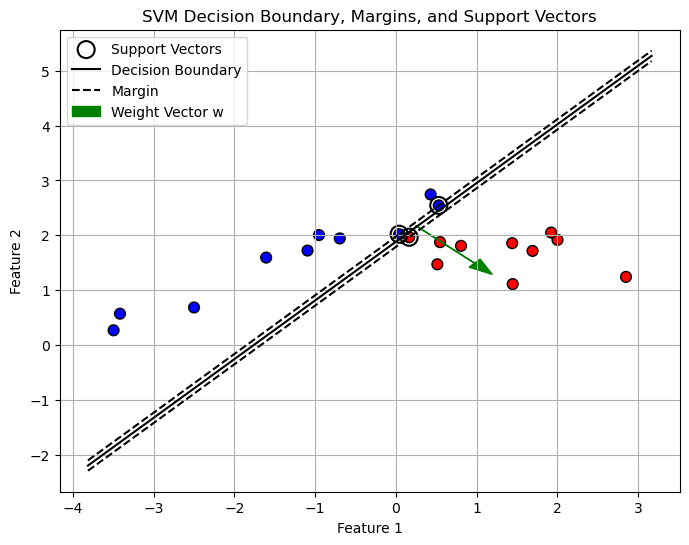

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate synthetic 2D data
X, y = make_classification(
    n_samples=20, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# Convert labels from {0, 1} to {-1, 1}
y = 2 * y - 1

# Fit linear SVM
clf = svm.SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract weight vector and bias
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot data points and decision boundary
plt.figure(figsize=(8, 6))

# Plot points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=60, edgecolors='k')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

# Plot decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = -(w[0] * xx + b) / w[1]
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')

# Plot weight vector as an arrow
center = np.mean(clf.support_vectors_, axis=0)
w_unit = w / np.linalg.norm(w)
plt.arrow(center[0], center[1], w_unit[0], w_unit[1], 
          head_width=0.2, head_length=0.3, fc='green', ec='green', label='Weight Vector w')

plt.legend()
plt.title("SVM Decision Boundary, Margins, and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

### 1.5 SVM vs Logistic Regression

Support Vector Machine (SVM) and Logistic Regression are both linear classifiers, but they are fundamentally different in objective and behaviour.

#### Objective Functions

- **Logistic Regression** minimises the logistic loss (also called cross-entropy loss) and outputs probabilities using the sigmoid function:

$$
\min_{\mathbf{w}, b} \ \sum_{i=1}^n \log(1 + \exp(-y_i(\mathbf{w} \cdot \mathbf{x}_i + b)))
$$

- **SVM** minimises hinge loss and aims to find a hyperplane that maximises the margin:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))
$$

#### Decision Boundaries

- Both yield linear decision boundaries in the original feature space.
- **SVM** places the boundary to maximise the distance (margin) from the closest points.
- **Logistic Regression** places the boundary where the probability of class membership is 0.5.

#### Probabilistic Output

- Logistic Regression gives a **probability estimate** via the sigmoid function.
- SVM does not inherently output probabilities, although probability estimates can be added post hoc via calibration.

#### Sensitivity to Outliers

- Logistic Regression is more robust to **mild outliers**, as every data point contributes to the loss.
- SVM is more sensitive to **support vectors**. A single outlier can significantly affect the decision boundary.

#### Instance vs Parametric

- SVM (especially in kernel form) is **instance-based** — the model relies on support vectors at inference.
- Logistic Regression is **parametric** — it learns a fixed set of weights $\mathbf{w}, b$ and discards training data.

#### Summary

| Feature                    | Logistic Regression                     | SVM                                      |
|----------------------------|------------------------------------------|-------------------------------------------|
| Loss Function              | Logistic loss (cross-entropy)            | Hinge loss                                |
| Margin Maximisation        | No                                       | Yes                                       |
| Output                     | Probability                              | Class label (margin-based)                |
| Probabilistic              | Yes (via sigmoid)                        | No (optional calibration)                 |
| Robust to Outliers         | More robust                              | Less robust                               |
| Based on Support Vectors   | No                                       | Yes                                       |
| Parametric or Instance-Based | Parametric                            | Instance-based (in dual form)             |

## 2. The Mathematics of SVM

### 2.1 Objective Function

The objective of a linear Support Vector Machine is to find the hyperplane that separates the data with the largest margin, while possibly allowing some misclassifications.

We introduce the idea of **hinge loss** and formulate the soft-margin SVM objective.

#### Primal Form (Soft Margin)

Given training data $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$ where $y_i \in \{-1, 1\}$, the optimisation problem is:

$$
\min_{\mathbf{w}, b, \boldsymbol{\xi}} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
$$

subject to:

$$
y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Here:
- $\|\mathbf{w}\|^2$ controls the margin width (smaller $\|\mathbf{w}\|$ → larger margin)
- $\xi_i$ are slack variables that allow margin violations (i.e., soft margin)
- $C$ is a regularisation parameter that controls the trade-off between margin size and misclassification penalty

This optimisation problem is convex and has a unique global minimum.

#### Unconstrained Reformulation with Hinge Loss

An equivalent unconstrained form is:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))
$$

The term $\max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))$ is known as the **hinge loss**, and it penalises:
- Correctly classified points **inside the margin**
- All **misclassified** points

Minimising the total objective balances:
- A large margin (by keeping $\|\mathbf{w}\|$ small)
- Few margin violations (by minimising hinge loss)

### 2.2 Simple Example of the SVM Objective

Suppose we have the following 3 data points:

| $\mathbf{x}$        | $y$  |
|---------------------|------|
| $[2, 3]$            | $+1$ |
| $[1, 1]$            | $+1$ |
| $[2, -1]$           | $-1$ |

Let’s use a simple linear classifier with:

- $\mathbf{w} = [1, 1]$
- $b = -3$
- $C = 1$ (regularisation parameter)

We want to compute the objective:

$$
\frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))
$$

Step 1: Compute $\|\mathbf{w}\|^2$  
$$
\|\mathbf{w}\|^2 = 1^2 + 1^2 = 2
$$

Step 2: Compute margin violations for each point

1. For $\mathbf{x}_1 = [2, 3],\ y_1 = +1$:
$$
\mathbf{w} \cdot \mathbf{x}_1 + b = 1\cdot2 + 1\cdot3 - 3 = 2
$$
$$
\text{Hinge loss} = \max(0, 1 - (+1)(2)) = \max(0, -1) = 0
$$

2. For $\mathbf{x}_2 = [1, 1],\ y_2 = +1$:
$$
\mathbf{w} \cdot \mathbf{x}_2 + b = 1 + 1 - 3 = -1
$$
$$
\text{Hinge loss} = \max(0, 1 - (+1)(-1)) = \max(0, 2) = 2
$$

3. For $\mathbf{x}_3 = [2, -1],\ y_3 = -1$:
$$
\mathbf{w} \cdot \mathbf{x}_3 + b = 2 - 1 - 3 = -2
$$
$$
\text{Hinge loss} = \max(0, 1 - (-1)(-2)) = \max(0, 1 - 2) = \max(0, -1) = 0
$$

Step 3: Total loss

- Margin penalty: $\frac{1}{2} \cdot 2 = 1$
- Hinge loss: $0 + 2 + 0 = 2$
- Total objective:
$$
1 + 1 \cdot 2 = 3
$$

So the total loss for this classifier is **3**.

#### Interpretation

- The second point is misclassified, so it incurs a hinge loss of 2.
- The first and third points are correctly classified and **outside the margin**, so their hinge loss is 0.
- Minimising the objective would push $\mathbf{w}$ and $b$ to correct the second point while keeping the margin wide.

### 2.2 Hinge Loss

Hinge loss is the core component of the SVM objective. It is designed to enforce a **margin-based** classification rule rather than a probabilistic one.

For a single data point $(\mathbf{x}_i, y_i)$, the hinge loss is defined as:

$$
\ell_{\text{hinge}}(y_i, \hat{y}_i) = \max(0, 1 - y_i \cdot \hat{y}_i)
$$

where $\hat{y}_i = \mathbf{w} \cdot \mathbf{x}_i + b$ is the raw output of the model before applying any threshold.

#### Intuition

- If $y_i \cdot \hat{y}_i \geq 1$, the point is **correctly classified and lies outside the margin** → hinge loss = 0.
- If $0 < y_i \cdot \hat{y}_i < 1$, the point is **correctly classified but inside the margin** → hinge loss > 0.
- If $y_i \cdot \hat{y}_i \leq 0$, the point is **misclassified** → hinge loss is large.

This is unlike logistic loss, where **every point** contributes some loss. Hinge loss is **zero for confident, correct predictions**.

#### Visual Interpretation

Hinge loss creates a **flat region** where there is no penalty once the margin is satisfied. The penalty only increases for:
- Points on the wrong side of the margin
- Points that are misclassified

This reflects the SVM principle: **only support vectors matter**. If a point is far enough from the margin, it doesn’t affect the model at all.

#### Summary of Comparison with Logistic Loss

| Loss Function      | Formula                                | Zero Loss When                         | Penalises |
|--------------------|-----------------------------------------|----------------------------------------|-----------|
| Hinge Loss         | $\max(0, 1 - y_i \cdot \hat{y}_i)$      | $y_i \cdot \hat{y}_i \geq 1$            | Margin violations and misclassifications |
| Logistic Loss      | $\log(1 + \exp(-y_i \cdot \hat{y}_i))$ | Never zero                              | All points |

Hinge loss gives SVM its **sparse solution** — only the support vectors contribute to the final model.

### 2.3 Lagrange Dual Form (Simplified Explanation)

In SVM, we want to find the best hyperplane (i.e., the best $\mathbf{w}$ and $b$) that separates the two classes with the widest possible margin.

So far, we’ve used the **primal form**, which directly solves for $\mathbf{w}$ and $b$:

$$
\min_{\mathbf{w}, b, \boldsymbol{\xi}} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i \quad \text{subject to } y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i
$$

But there's another way: the **dual form**.

---

#### Why Do We Use the Dual Form?

**1. To use kernels**

In nonlinear SVMs, we can't work directly with $\mathbf{x}_i$, but we can still compute dot products $(\mathbf{x}_i \cdot \mathbf{x}_j)$. This lets us replace the dot product with a **kernel function**:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j)^2 \quad \text{or} \quad \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)
$$

**2. To handle high-dimensional data efficiently**

The primal form scales with the number of features. The dual form scales with the number of samples — often more efficient if features are very high-dimensional.

---

#### What Is the Dual Form?

We introduce a Lagrange multiplier $\alpha_i$ for each sample. The dual problem becomes:

$$
\max_{\boldsymbol{\alpha}} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (\mathbf{x}_i \cdot \mathbf{x}_j)
$$

subject to:

$$
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

Only points with $\alpha_i > 0$ are **support vectors**.

We can then reconstruct:

$$
\mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i
$$

And the final decision function becomes:

$$
f(\mathbf{x}) = \sum_{i=1}^n \alpha_i y_i (\mathbf{x}_i \cdot \mathbf{x}) + b
$$

---

#### Summary

| Form        | Solves For     | Good For                     | Key Idea                         |
|-------------|----------------|-------------------------------|----------------------------------|
| Primal      | $\mathbf{w}, b$ | Few features                 | Direct optimisation              |
| Dual        | $\alpha_i$      | Kernels, high dimensions      | Model expressed via dot products |

### 2.4 Kernel Trick

In many real-world datasets, the classes are not linearly separable in their original feature space.

To handle this, we can map the data to a higher-dimensional space where linear separation becomes possible. However, computing this mapping explicitly can be expensive or even infinite-dimensional.

#### Kernel Trick

The kernel trick allows us to compute the dot product between two data points **in the transformed space** without ever explicitly performing the transformation.

That is, for a feature mapping $\phi(\cdot)$:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)
$$

A kernel function **computes this dot product directly**.

#### Common Kernel Functions

- **Linear Kernel**:
  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
  $$

- **Polynomial Kernel**:
  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + 1)^d
  $$

- **RBF (Gaussian) Kernel**:
  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
  $$

#### Why This Works in SVM

In the dual form of SVM, the decision function is written in terms of dot products:

$$
f(\mathbf{x}) = \sum_{i=1}^n \alpha_i y_i (\mathbf{x}_i \cdot \mathbf{x}) + b
$$

By replacing $(\mathbf{x}_i \cdot \mathbf{x})$ with a kernel function $K(\mathbf{x}_i, \mathbf{x})$, we can build nonlinear classifiers **without explicitly transforming the data**.

This is what makes SVMs so powerful: they can create highly flexible decision boundaries while keeping the computation tractable.

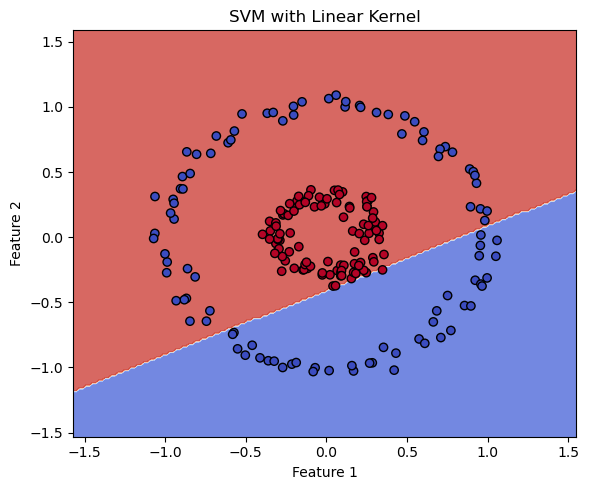

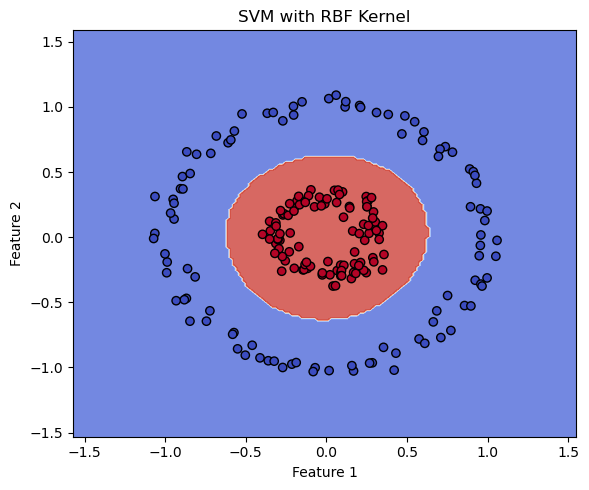

In [2]:
# Re-run after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# Generate a synthetic non-linearly separable dataset
X, y = make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)

# Train two SVM models: one with a linear kernel, one with an RBF kernel
clf_linear = svm.SVC(kernel='linear', C=1)
clf_rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)

clf_linear.fit(X, y)
clf_rbf.fit(X, y)

# Plotting function
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()

# Plot both decision boundaries
plot_decision_boundary(clf_linear, X, y, "SVM with Linear Kernel")
plot_decision_boundary(clf_rbf, X, y, "SVM with RBF Kernel")

## 3. Implementing a Linear SVM

### 3.1 With Scikit-Learn

Scikit-Learn provides a simple and efficient interface to train a linear SVM using the `SVC` class. To train a basic linear classifier:

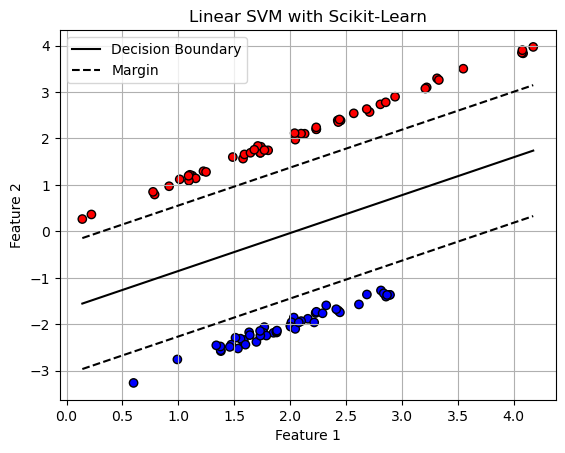

In [4]:
from sklearn import svm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a 2D linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=2, random_state=42)

# Train a linear SVM
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Plot the decision boundary
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')

# Plot decision boundary
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

# Plot margins
margin = 1 / np.linalg.norm(w)
y_vals_down = y_vals - margin
y_vals_up = y_vals + margin
plt.plot(x_vals, y_vals_down, 'k--', label='Margin')
plt.plot(x_vals, y_vals_up, 'k--')

plt.legend()
plt.title("Linear SVM with Scikit-Learn")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [5]:
print(w)

[-0.4487059   0.54945964]


### 3.2 From Scratch with Gradient Descent

While SVMs are typically solved using **quadratic programming**, we can implement a simple version of the **soft-margin SVM** using gradient descent. This helps build intuition for the loss function and optimisation.

We use the unconstrained hinge loss formulation:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))
$$

Here is a basic implementation:

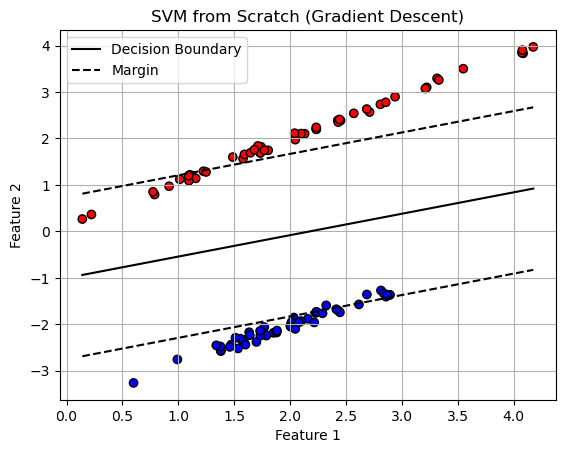

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=2, random_state=42)

# Convert y from {0, 1} to {-1, +1}
y = 2 * y - 1

# Hyperparameters
C = 1.0
learning_rate = 0.001
n_epochs = 1000

# Initial weights and bias
w = np.zeros(X.shape[1])
b = 0

# Training loop
for epoch in range(n_epochs):
    for i in range(len(X)):
        condition = y[i] * (np.dot(X[i], w) + b)
        if condition >= 1:
            grad_w = w
            grad_b = 0
        else:
            grad_w = w - C * y[i] * X[i]
            grad_b = -C * y[i]

        # Update weights and bias
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

# Visualise results
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
margin = 1 / np.linalg.norm(w)
y_vals_down = y_vals - margin
y_vals_up = y_vals + margin

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_vals_down, 'k--', label='Margin')
plt.plot(x_vals, y_vals_up, 'k--')
plt.title("SVM from Scratch (Gradient Descent)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 4. Kernel SVM

### 4.1 Why Use Kernels?

Linear SVMs can only draw straight-line decision boundaries in the original feature space. But many real-world datasets are not linearly separable.

To address this, we map the original data into a **higher-dimensional space** using a nonlinear transformation:

$$
\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m, \quad \text{with } m > n
$$

In this transformed space, the data might become **linearly separable**.

However, computing $\phi(\mathbf{x})$ explicitly is often:
- Computationally expensive
- Infeasible for very high- or infinite-dimensional feature spaces

#### The Kernel Trick

SVM's dual form only requires **dot products** between pairs of data points:

$$
\phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)
$$

A **kernel function** $K(\mathbf{x}_i, \mathbf{x}_j)$ computes this dot product **implicitly** — without needing to compute $\phi(\mathbf{x})$ directly.

This allows SVMs to create highly flexible **nonlinear decision boundaries** in the original input space, while still solving the problem efficiently.

#### Summary

| Strategy           | Works In...       | Boundary Shape    | Good For                |
|--------------------|-------------------|-------------------|-------------------------|
| Linear SVM         | Original space    | Straight line     | Simple, linearly separable data |
| Kernel SVM         | Implicit feature space | Nonlinear curves | Complex or structured data      |

### 4.2 Common Kernels

Kernel functions allow Support Vector Machines to operate in high-dimensional feature spaces without explicitly computing the transformation. Below are some commonly used kernel functions.

#### 1. Linear Kernel

This is equivalent to a standard linear SVM.

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
$$

- No transformation — just the dot product.
- Works well when the data is already linearly separable.

#### 2. Polynomial Kernel

Maps the original features into a polynomial feature space of degree $d$.

$$
K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d
$$

- The constant $c$ (often 1) controls the influence of higher-order terms.
- The degree $d$ controls the model complexity.
- Useful for capturing curved relationships with moderate nonlinearity.

#### 3. Radial Basis Function (RBF) Kernel / Gaussian Kernel

Very popular and powerful for general-purpose classification. It maps the data into an **infinite-dimensional** space.

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
$$

- $\gamma$ controls the spread of the kernel. A small $\gamma$ leads to smoother decision boundaries.
- Capable of modelling complex and highly nonlinear boundaries.

#### 4. Sigmoid Kernel

Inspired by the activation function in neural networks:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\alpha \cdot \mathbf{x}_i \cdot \mathbf{x}_j + c)
$$

- Not commonly used in practice.
- Behaves like a neural net with one hidden layer.



#### Summary Table

| Kernel      | Formula                                          | Notes                                   |
|-------------|--------------------------------------------------|-----------------------------------------|
| Linear      | $\mathbf{x}_i \cdot \mathbf{x}_j$                | No transformation; fastest to compute   |
| Polynomial  | $(\mathbf{x}_i \cdot \mathbf{x}_j + c)^d$        | Good for moderate nonlinearity          |
| RBF         | $\exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)$| Very flexible, high complexity           |
| Sigmoid     | $\tanh(\alpha \cdot \mathbf{x}_i \cdot \mathbf{x}_j + c)$ | Rarely used                             |

Scikit-Learn uses the **RBF kernel as default**, and it's usually a good starting point if you're unsure.

## 5. Summary and Comparison with Logistic Regression

Support Vector Machines (SVMs) and Logistic Regression are both popular linear classifiers, but they differ significantly in philosophy, implementation, and behaviour.

### 5.1 Summary of SVM

- SVM aims to find the **maximum-margin hyperplane** that separates the classes.
- It uses the **hinge loss** function and focuses on points **closest to the decision boundary** (support vectors).
- SVM can be extended to **nonlinear classification** using **kernel functions**, without explicitly transforming the input space.
- Only support vectors affect the model — resulting in a **sparse solution**.

### 5.2 Comparison with Logistic Regression

| Feature                     | Logistic Regression                        | SVM                                          |
|-----------------------------|---------------------------------------------|----------------------------------------------|
| Objective                   | Maximise likelihood / minimise log loss    | Maximise margin / minimise hinge loss        |
| Decision Boundary           | Based on probability threshold (sigmoid)   | Based on distance from margin                |
| Loss Function               | Log loss (cross-entropy)                   | Hinge loss                                   |
| Output                      | Probabilistic (0–1)                        | Hard decision (+1 or -1)                     |
| Sensitivity to Outliers     | More robust                                | Sensitive if C is too large                  |
| Parametric vs Instance-based| Parametric                                 | Instance-based (support vectors)             |
| Kernel Support              | Not native                                 | Built-in via kernel trick                    |
| Probability Estimates       | Native                                     | Requires post-processing (e.g., Platt scaling) |
| Works Well For              | Interpretable, probabilistic models         | Margin-based classification, flexible kernels |

### 5.3 Choosing Between SVM and Logistic Regression

- Use **Logistic Regression** when:
  - You want **probability estimates**
  - You need an **interpretable model**
  - Data is linearly separable or moderately complex

- Use **SVM** when:
  - You want **maximum margin separation**
  - You expect complex or **nonlinear patterns**
  - You are okay with fewer support vectors driving the decision

Both methods are effective — your choice depends on whether you prioritise interpretability, margin maximisation, or kernel-based flexibility.

## 6 Implementing Linear SVM

This code demonstrates how to train a hard-margin linear SVM using quadratic programming via the cvxopt library.


### 6.1 What is cvxopt?

cvxopt is a Python library for convex optimisation, including:
	•	Solving quadratic programs (QPs)
	•	Linear programs
	•	Matrix computations

It is ideal for solving the kind of constrained optimisation problem SVM requires.


### 6.2 Problem Setup: Hard-Margin SVM

We want to solve the following optimisation problem:

Minimise:
$$
\frac{1}{2} |w|^2
$$

Subject to:
$$
y_i (w^T x_i + b) \geq 1 \quad \text{for all } i
$$

We convert this into a standard QP format:

Minimise:
$$
\frac{1}{2} x^T P x + q^T x
$$

Subject to:
$$
Gx \leq h
$$

Where x = [w_1, w_2, b] (weights and bias combined).

In [16]:
import numpy as np
from cvxopt import matrix, solvers

# Training data (linearly separable)
X = np.array([[2, 2], [4, 4], [2, 4], [4, 2]], dtype='float64')
y = np.array([-1, 1, 1, -1], dtype='float64')

n_samples, n_features = X.shape

# Create matrices for the quadratic program
# Minimize (1/2) * w^T w subject to y_i (w^T x_i + b) >= 1

# We'll formulate variables as [w1, w2, b] together
P = np.zeros((3, 3))
P[0, 0] = 1.0
P[1, 1] = 1.0
P = matrix(P)

q = matrix(np.zeros((3, 1)))

# Construct inequality constraints: -y_i * (w^T x_i + b) <= -1
G = []
h = []
for xi, yi in zip(X, y):
    constraint = np.zeros(3)
    constraint[0:2] = -yi * xi
    constraint[2] = -yi
    G.append(constraint)
    h.append(-1.0)

G = matrix(np.array(G))
h = matrix(np.array(h))

# Solve QP problem
solvers.options['show_progress'] = True
solution = solvers.qp(P, q, G, h)

# Extract w and b
w = np.array(solution['x'][:2]).flatten()
b = float(solution['x'][2])

print("Solved w:", w)
print("Solved b:", b)

     pcost       dcost       gap    pres   dres
 0:  3.2000e-01  4.8000e-01  8e-01  1e+00  2e-15
 1:  4.3687e-01  4.9787e-01  9e-03  8e-02  8e-16
 2:  4.9965e-01  5.0000e-01  1e-04  5e-04  1e-14
 3:  5.0000e-01  5.0000e-01  1e-06  5e-06  8e-15
 4:  5.0000e-01  5.0000e-01  1e-08  5e-08  7e-15
Optimal solution found.
Solved w: [2.16019800e-17 9.99999965e-01]
Solved b: -2.9999998937593415


## 7 Hard-Margin SVM with RBF Kernel using CVXOPT

This notebook demonstrates how to train a kernelised (RBF) SVM from scratch using the dual form and `cvxopt`.

In [18]:
###  Step 1: Import libraries and define RBF kernel
import numpy as np
from cvxopt import matrix, solvers

def rbf_kernel(x1, x2, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

### Step 2: Create toy dataset (non-linearly separable)
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
], dtype='float64')

# Labels: XOR pattern
y = np.array([-1, 1, 1, -1], dtype='float64')
n = len(X)

### Step 3: Build QP matrices
# Compute the P matrix
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = y[i] * y[j] * rbf_kernel(X[i], X[j], gamma=1.0)

P = matrix(K)
q = matrix(-np.ones(n))

# Inequality constraints: αᵢ ≥ 0 → -αᵢ ≤ 0
G = matrix(-np.eye(n))
h = matrix(np.zeros(n))

# Equality constraint: sum(αᵢ * yᵢ) = 0
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))


### Step 4: Solve the QP problem
solvers.options['show_progress'] = False
solution = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Support vectors: where alpha > 1e-5
support_vector_indices = np.where(alphas > 1e-5)[0]
support_vectors = X[support_vector_indices]
support_alphas = alphas[support_vector_indices]
support_labels = y[support_vector_indices]

print("Support vector indices:", support_vector_indices)
print("Alphas:", support_alphas)

### Step 5: Compute bias term b
# Pick one support vector to compute b
k = support_vector_indices[0]
b = y[k] - np.sum(support_alphas * support_labels * 
                  np.array([rbf_kernel(X[k], sv) for sv in support_vectors]))
print("Bias b:", b)

### Step 6: Define prediction function
def predict(x):
    result = 0
    for alpha, sv_y, sv_x in zip(support_alphas, support_labels, support_vectors):
        result += alpha * sv_y * rbf_kernel(sv_x, x)
    return np.sign(result + b)


### Step 7: Evaluate on training set
predictions = np.array([predict(x) for x in X])
print("Predictions:", predictions)
print("Ground truth:", y)

Support vector indices: [0 1 2 3]
Alphas: [2.50265032 2.50265032 2.50265032 2.50265032]
Bias b: -0.6125443783999633
Predictions: [-1. -1. -1. -1.]
Ground truth: [-1.  1.  1. -1.]


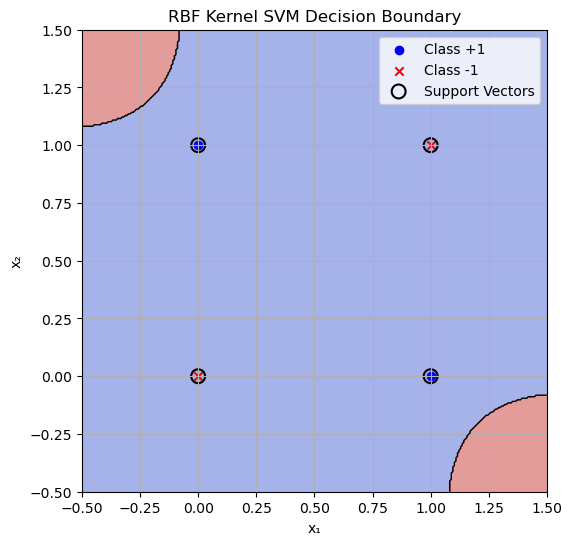

In [20]:
### ✅ Step 8: Visualise decision boundary and support vectors
import matplotlib.pyplot as plt

# Create a grid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict for each point in the grid
Z = np.array([predict(pt) for pt in grid])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=1)

# Plot training data
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Class +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Class -1')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.title("RBF Kernel SVM Decision Boundary")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()